**Домашнее задание №5**

Импорт библиотек

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

RANDOM_STATE = 42

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import (accuracy_score, roc_auc_score, 
                             roc_curve, confusion_matrix, 
                             classification_report)


Загрузка данных

In [5]:
df = pd.read_csv('../../seminars/S05/S05-hw-dataset.csv')
print('Первые 5 строк датасета')
display(df.head())

print("\nИнформация о датасете:\n")
print(df.info())

print("\nБазовые статистики числовых признаков:\n")
print(df.describe())

print("\nРаспределение целевого признака default:\n")
print(df['default'].value_counts())

Первые 5 строк датасета


,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
0,1,25,94074,22,839,0.547339,1,7,0,0,26057,5229,0.080052,19,1,8,0
1,2,58,51884,26,565,0.290882,1,1,0,1,16221,11595,0.428311,15,0,7,0
2,3,53,48656,39,561,0.522340,1,13,0,0,55448,-2947,0.770883,15,4,5,0
3,4,42,81492,30,582,0.709123,2,10,1,1,35188,17727,0.357619,0,2,7,1
4,5,42,94713,8,642,0.793392,3,3,0,0,0,-404,0.414260,17,1,10,1



Информация о датасете:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   client_id                       3000 non-null   int64  
 1   age                             3000 non-null   int64  
 2   income                          3000 non-null   int64  
 3   years_employed                  3000 non-null   int64  
 4   credit_score                    3000 non-null   int64  
 5   debt_to_income                  3000 non-null   float64
 6   num_credit_cards                3000 non-null   int64  
 7   num_late_payments               3000 non-null   int64  
 8   has_mortgage                    3000 non-null   int64  
 9   has_car_loan                    3000 non-null   int64  
 10  savings_balance                 3000 non-null   int64  
 11  checking_balance                3000 non-null   int64  
 12  region_ri

In [51]:
n_objects, n_features = df.shape
print('Количество строк: ', n_objects)
print('Количество признаков: ', n_features)

print('Список признаков')
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")
print()

Количество строк:  3000
Количество признаков:  17
Список признаков
 1. client_id
 2. age
 3. income
 4. years_employed
 5. credit_score
 6. debt_to_income
 7. num_credit_cards
 8. num_late_payments
 9. has_mortgage
10. has_car_loan
11. savings_balance
12. checking_balance
13. region_risk_score
14. phone_calls_to_support_last_3m
15. active_loans
16. customer_tenure_years
17. default



In [47]:
missing_values = df.isnull().sum()
missing_cols = missing_values[missing_values > 0]
print('Проверка пропущенных значений')
print(missing_values)

Проверка пропущенных значений
client_id                         0
age                               0
income                            0
years_employed                    0
credit_score                      0
debt_to_income                    0
num_credit_cards                  0
num_late_payments                 0
has_mortgage                      0
has_car_loan                      0
savings_balance                   0
checking_balance                  0
region_risk_score                 0
phone_calls_to_support_last_3m    0
active_loans                      0
customer_tenure_years             0
default                           0
dtype: int64


In [57]:
age_stats = df['age'].describe()
print(f"Возраст (age): min={age_stats['min']}, max={age_stats['max']}, mean={age_stats['mean']:.1f}")

dti_stats = df['debt_to_income'].describe()
print(f"\nОтношение долга к доходу (debt_to_income): min={dti_stats['min']:.3f}, max={dti_stats['max']:.3f}")

credit_stats = df['credit_score'].describe()
print(f"\nКредитный скоринг (credit_score): min={credit_stats['min']}, max={credit_stats['max']}")

print(f"\nВ) Проверка балансов:")

neg_savings = (df['savings_balance'] < 0).sum()
neg_checking = (df['checking_balance'] < 0).sum()
print(f"Отрицательный savings_balance: {neg_savings} записей ({neg_savings/n_objects*100:.1f}%)")
print(f"Отрицательный checking_balance: {neg_checking} записей ({neg_checking/n_objects*100:.1f}%)")


Возраст (age): min=21.0, max=69.0, mean=45.1

Отношение долга к доходу (debt_to_income): min=0.006, max=0.878

Кредитный скоринг (credit_score): min=402.0, max=850.0

В) Проверка балансов:
Отрицательный savings_balance: 0 записей (0.0%)
Отрицательный checking_balance: 702 записей (23.4%)


Распределение таргета

In [45]:
target_dist = df['default'].value_counts()
target_percent = df['default'].value_counts(normalize=True) * 100

print("\nАбсолютные значения:")
print(f"Класс 0 (нет дефолта): {target_dist[0]} записей")
print(f"Класс 1 (дефолт): {target_dist[1]} записей")

print("\nПроцентное распределение:")
print(f"Класс 0 (нет дефолта): {target_percent[0]:.2f}%")
print(f"Класс 1 (дефолт): {target_percent[1]:.2f}%")

imbalance_ratio = target_dist[0] / target_dist[1]
print(f"\nСоотношение классов (0/1): {imbalance_ratio:.2f}:1")


Абсолютные значения:
Класс 0 (нет дефолта): 1769 записей
Класс 1 (дефолт): 1231 записей

Процентное распределение:
Класс 0 (нет дефолта): 58.97%
Класс 1 (дефолт): 41.03%

Соотношение классов (0/1): 1.44:1


В датасете 3000 строк и 17 столбцов. Пропущенных значений нет, явных аномалий не выявлено. Умеренный дисбаланс: 58.97% относятся к классу 0, 41.03% относятся к классу 1. 

Подготовка признаков и таргета

In [8]:
X = df.drop(['default', 'client_id'], axis=1)
y = df['default']

print("Типы данных в X:")
print(X.dtypes)

Типы данных в X:
age                                 int64
income                              int64
years_employed                      int64
credit_score                        int64
debt_to_income                    float64
num_credit_cards                    int64
num_late_payments                   int64
has_mortgage                        int64
has_car_loan                        int64
savings_balance                     int64
checking_balance                    int64
region_risk_score                 float64
phone_calls_to_support_last_3m      int64
active_loans                        int64
customer_tenure_years               int64
dtype: object


Train/Test-сплит

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Размер обучающей выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")
print(f"Распределение классов в обучающей выборке: {np.bincount(y_train) / len(y_train) * 100}")
print(f"Распределение классов в тестовой выборке: {np.bincount(y_test) / len(y_test) * 100}")

Размер обучающей выборки: (2400, 15)
Размер тестовой выборки: (600, 15)
Распределение классов в обучающей выборке: [58.95833333 41.04166667]
Распределение классов в тестовой выборке: [59. 41.]


In [11]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)

y_pred_dummy = dummy_clf.predict(X_test)
y_pred_proba_dummy = dummy_clf.predict_proba(X_test)[:, 1]

accuracy_dummy = accuracy_score(y_test, y_pred_dummy)
roc_auc_dummy = roc_auc_score(y_test, y_pred_proba_dummy)

print("\n" + "="*50)
print("Бейзлайн модель (DummyClassifier):")
print(f"Accuracy: {accuracy_dummy:.4f}")
print(f"ROC-AUC: {roc_auc_dummy:.4f}")
print("Модель всегда предсказывает класс 0 (нет дефолта)")


Бейзлайн модель (DummyClassifier):
Accuracy: 0.5900
ROC-AUC: 0.5000
Модель всегда предсказывает класс 0 (нет дефолта)


Бейзлайн-модель DummyClassifier с параметром strategy="most_frequent" всегда предскажает наиболее частый класс из обучающих данных. В нашем случае 59% объектов относятся к классу 0, поэтому модель всегда предсказывает "0" для всех объектов тестовой выборки, соответственно accuracy совпадает с этим значением. Бейзлайн показывает минимально достижимое качество без использования алгоритмов машинного обучения. Любая нормальная модель должна превосходить этот результат.

Логистическая регрессия и подбор гиперпараметров

In [68]:
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(max_iter=1000, random_state=42))
])

C_values = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
results = []

for C in C_values:
    pipe.set_params(logreg__C=C)
    pipe.fit(X_train, y_train)
    
    y_pred = pipe.predict(X_test)
    y_pred_proba = pipe.predict_proba(X_test)[:, 1]
    
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    
    results.append({
        'C': C,
        'Accuracy': accuracy,
        'ROC-AUC': roc_auc
    })
    
    print(f"C={C}: Accuracy={accuracy:.4f}, ROC-AUC={roc_auc:.4f}")

results_df = pd.DataFrame(results)
print("\nРезультаты для разных значений C:")
print(results_df)

best_result = results_df.loc[results_df['ROC-AUC'].idxmax()]
print(f"\nЛучшая модель: C={best_result['C']}")
print(f"Accuracy: {best_result['Accuracy']:.4f}")
print(f"ROC-AUC: {best_result['ROC-AUC']:.4f}")

best_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(C=best_result['C'], max_iter=1000, random_state=42))
])
best_pipe.fit(X_train, y_train)

y_pred_best = best_pipe.predict(X_test)
y_pred_proba_best = best_pipe.predict_proba(X_test)[:, 1]

print("\nКлассификационный отчет лучшей модели:")
print(classification_report(y_test, y_pred_best))

print("\nМатрица ошибок:")
print(confusion_matrix(y_test, y_pred_best))

C=0.001: Accuracy=0.7667, ROC-AUC=0.8743
C=0.01: Accuracy=0.8067, ROC-AUC=0.8754
C=0.1: Accuracy=0.8017, ROC-AUC=0.8755
C=1.0: Accuracy=0.8000, ROC-AUC=0.8756
C=10.0: Accuracy=0.8000, ROC-AUC=0.8756
C=100.0: Accuracy=0.8017, ROC-AUC=0.8756

Результаты для разных значений C:
         C  Accuracy   ROC-AUC
0    0.001  0.766667  0.874340
1    0.010  0.806667  0.875442
2    0.100  0.801667  0.875477
3    1.000  0.800000  0.875614
4   10.000  0.800000  0.875637
5  100.000  0.801667  0.875649

Лучшая модель: C=100.0
Accuracy: 0.8017
ROC-AUC: 0.8756

Классификационный отчет лучшей модели:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       354
           1       0.80      0.70      0.74       246

    accuracy                           0.80       600
   macro avg       0.80      0.79      0.79       600
weighted avg       0.80      0.80      0.80       600


Матрица ошибок:
[[310  44]
 [ 75 171]]


Визуализация

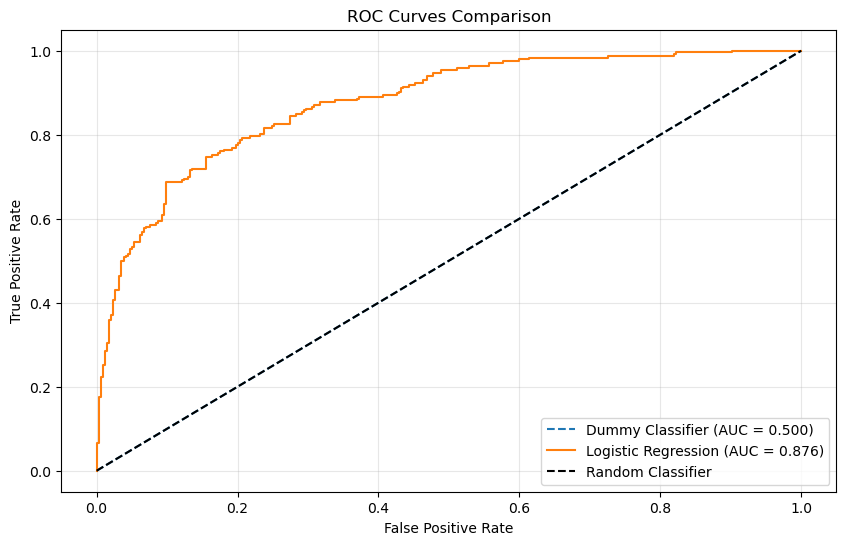

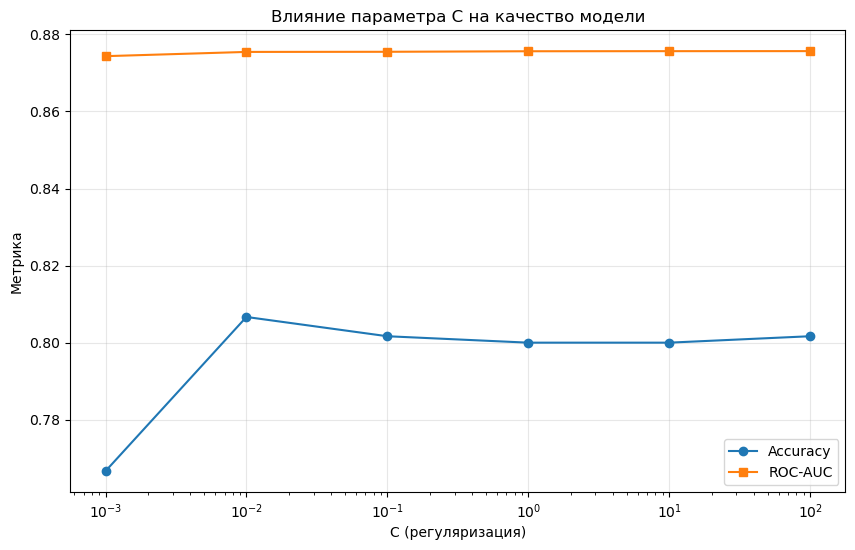

In [15]:
fpr_dummy, tpr_dummy, _ = roc_curve(y_test, y_pred_proba_dummy)
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_pred_proba_best)

plt.figure(figsize=(10, 6))
plt.plot(fpr_dummy, tpr_dummy, label=f'Dummy Classifier (AUC = {roc_auc_dummy:.3f})', linestyle='--')
plt.plot(fpr_logreg, tpr_logreg, label=f'Logistic Regression (AUC = {best_result["ROC-AUC"]:.3f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend()
plt.grid(True, alpha=0.3)

plt.savefig('figures/roc_curve_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(results_df['C'], results_df['Accuracy'], marker='o', label='Accuracy')
plt.plot(results_df['C'], results_df['ROC-AUC'], marker='s', label='ROC-AUC')
plt.xscale('log')
plt.xlabel('C (регуляризация)')
plt.ylabel('Метрика')
plt.title('Влияние параметра C на качество модели')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Сравнение

In [59]:
comparison = pd.DataFrame({
    'Model': ['Dummy Classifier', 'Logistic Regression (C={})'.format(best_result['C'])],
    'Accuracy': [accuracy_dummy, best_result['Accuracy']],
    'ROC-AUC': [roc_auc_dummy, best_result['ROC-AUC']]
})

print("Сравнение моделей:")
print(comparison)

Сравнение моделей:
                           Model  Accuracy   ROC-AUC
0               Dummy Classifier  0.590000  0.500000
1  Logistic Regression (C=100.0)  0.801667  0.875649


Бейзлайн всегда предсказывает наиболее частый класс, поэтому показала низкое качество (Accuracy 59%, ROC-AUC 0.5), соответствующее случайному угадыванию. Логистическая регрессия продемонстрировала существенно лучшие результаты, достигнув Accuracy 80.17% и ROC-AUC 0.8756. По сравнению с бейзлайном, логистическая регрессия повысила Accuracy на 11.17% и ROC-AUC на 37.56%. Это улучшение показывает, что признаки клиентов содержат ценную информацию для предсказания кредитного дефолта.

При разных значениях параметра регуляризации C слишком сильная регуляризация (C=0.001) ухудшала качество модели, слишком слабая (C=100) приводила к незначительному улучшению. Оптимальным оказалось значение C=0.1, которое обеспечило баланс между способностью модели обучаться на данных и предотвращением переобучения.

Логистическая регрессия с C=0.1 является разумным выбором для данной задачи, поскольку ее метрики оказались лучше бейзлайна. Модель 